In [145]:
# Import the pandas library, commonly used for data manipulation and analysis
# Pandas provides data structures like DataFrame and Series, and functions for data operations
import pandas as pd

In [68]:
# Load the full HTS dataset
df = pd.read_csv('hts_2025_revision_16_csv.csv', dtype={'HTS Number': str})

In [146]:
# Ensure the code is treated as string and grab first 2 digits (chapter)
df['chapter'] = df['HTS Number'].str[:2]

In [147]:
# Filter for food chapters 01 to 24
food_df = df[pd.to_numeric(df['chapter'], errors='coerce').between(1, 24)]

In [148]:
food_df.head()

,HTS Number,Indent,Description,Unit of Quantity,General Rate of Duty,Special Rate of Duty,Column 2 Rate of Duty,Quota Quantity,Additional Duties,chapter
0,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,NaN,NaN,NaN,NaN,01
2,0101.21.00,2,Purebred breeding animals,NaN,Free,NaN,Free,NaN,NaN,01
3,0101.21.00.10,3,Males,"[""No.""]",NaN,NaN,NaN,NaN,NaN,01
4,0101.21.00.20,3,Females,"[""No.""]",NaN,NaN,NaN,NaN,NaN,01
5,0101.29.00,2,Other,NaN,Free,NaN,20%,NaN,NaN,01


In [149]:
chapter_counts = df['chapter'].value_counts().sort_index()
chapter_counts = chapter_counts.loc[chapter_counts.index.isin([str(i).zfill(2) for i in range(1, 25)])]
print(chapter_counts)

01    100
02    219
03    697
04    310
05     56
06     96
07    524
08    319
09    118
10     92
11     73
12    217
13     32
14     21
15    164
16    248
17    118
18     92
19    129
20    362
21    139
22    153
23     84
24    252
Name: chapter, dtype: int64


In [150]:
print(f"Number of food-related HTS entries: {len(food_df)}")

Number of food-related HTS entries: 4615


In [151]:
food_df.shape

(4615, 10)

In [152]:
food_df.dtypes

HTS Number                object
Indent                     int64
Description               object
Unit of Quantity          object
General Rate of Duty      object
Special Rate of Duty      object
Column 2 Rate of Duty     object
Quota Quantity           float64
Additional Duties         object
chapter                   object
dtype: object

In [153]:
# How many missing (NaN or blank) in each column?
missing_counts = food_df.isnull().sum()

print("Missing values per column:")
print(missing_counts)

Missing values per column:
HTS Number                  0
Indent                      0
Description                 0
Unit of Quantity         1018
General Rate of Duty     2453
Special Rate of Duty     3069
Column 2 Rate of Duty    2453
Quota Quantity           4615
Additional Duties        4615
chapter                     0
dtype: int64


In [78]:
import numpy as np
country_list = [
    'Thailand', 'China', 'India', 'Italy', 'Brazil', 'United States', 
    'Canada', 'Mexico', 'Australia', 'Vietnam', 'Spain', 'France'
]

def assign_countries(description, n=3):
    """
    Select up to n realistic countries for each food item.
    """
    desc = str(description).lower()
    if 'cheese' in desc or 'parmesan' in desc:
        return ['Italy', 'France', 'United States']
    if 'mango' in desc:
        return ['India', 'Mexico', 'Thailand']
    if 'tuna' in desc:
        return ['Thailand', 'Vietnam', 'United States']
    if 'citrus' in desc or 'orange' in desc:
        return ['Spain', 'Brazil', 'United States']
    if 'coffee' in desc:
        return ['Brazil', 'Vietnam', 'Colombia']
    if 'avocado' in desc:
        return ['Mexico', 'Peru', 'Chile']
    if 'tomato' in desc:
        return ['Italy', 'United States', 'Mexico']
    # Add more mappings as you wish
    return list(np.random.choice(country_list, size=n, replace=False))

# Expand the DataFrame
expanded_rows = []
for idx, row in food_df.iterrows():
    countries = assign_countries(row['Description'])
    for country in countries:
        new_row = row.copy()
        new_row['Country of Origin'] = country
        expanded_rows.append(new_row)

food_expanded = pd.DataFrame(expanded_rows)

# Preview the expanded dataset
print(food_expanded.head(10))


      HTS Number  Indent                             Description  \
0           0101       0  Live horses, asses, mules and hinnies:   
0           0101       0  Live horses, asses, mules and hinnies:   
0           0101       0  Live horses, asses, mules and hinnies:   
2     0101.21.00       2               Purebred breeding animals   
2     0101.21.00       2               Purebred breeding animals   
2     0101.21.00       2               Purebred breeding animals   
3  0101.21.00.10       3                                   Males   
3  0101.21.00.10       3                                   Males   
3  0101.21.00.10       3                                   Males   
4  0101.21.00.20       3                                 Females   

  Unit of Quantity General Rate of Duty Special Rate of Duty  \
0              NaN                  NaN                  NaN   
0              NaN                  NaN                  NaN   
0              NaN                  NaN                  Na

In [154]:
food_expanded.drop(['Column 2 Rate of Duty', 'Quota Quantity', 'Additional Duties', 'General Rate of Duty'], axis=1, inplace=True)

KeyError: "['Column 2 Rate of Duty', 'Quota Quantity', 'Additional Duties', 'General Rate of Duty'] not found in axis"

In [155]:
food_expanded.head()

,Indent,Description,Unit of Quantity,Chapter,Country of Origin,special_rate_eligible,heading_code,subheading_code,hts_length
0,0,"Live horses, asses, mules and hinnies:",NaN,01,Spain,0,0101,0101,4
1,0,"Live horses, asses, mules and hinnies:",NaN,01,Thailand,0,0101,0101,4
2,0,"Live horses, asses, mules and hinnies:",NaN,01,Mexico,0,0101,0101,4
3,2,Purebred breeding animals,NaN,01,Australia,0,0101,0101.2,10
4,2,Purebred breeding animals,NaN,01,Spain,0,0101,0101.2,10


In [81]:
food_expanded.columns

Index(['HTS Number', 'Indent', 'Description', 'Unit of Quantity',
       'Special Rate of Duty', 'chapter', 'Country of Origin'],
      dtype='object')

In [82]:
food_expanded.rename(columns={'chapter': 'Chapter'}, inplace=True)

In [83]:
import pandas as pd

def is_special_rate(row):
    val = str(row['Special Rate of Duty']).strip().lower()
    # Exclude missing, '-', 'nan', and 'free' (if you want to treat as no special/preference)
    if val and val not in ['', '-', 'nan'] and val != 'nan':
        return 1
    return 0

food_expanded['special_rate_eligible'] = food_expanded.apply(is_special_rate, axis=1)

In [89]:
food_expanded.head(30)

,HTS Number,Indent,Description,Unit of Quantity,Special Rate of Duty,Chapter,Country of Origin,special_rate_eligible
0,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,01,Spain,0
1,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,01,Thailand,0
2,0101,0,"Live horses, asses, mules and hinnies:",NaN,NaN,01,Mexico,0
3,0101.21.00,2,Purebred breeding animals,NaN,NaN,01,Australia,0
4,0101.21.00,2,Purebred breeding animals,NaN,NaN,01,Spain,0
5,0101.21.00,2,Purebred breeding animals,NaN,NaN,01,Italy,0
6,0101.21.00.10,3,Males,"[""No.""]",NaN,01,India,0
7,0101.21.00.10,3,Males,"[""No.""]",NaN,01,Canada,0
8,0101.21.00.10,3,Males,"[""No.""]",NaN,01,Australia,0
9,0101.21.00.20,3,Females,"[""No.""]",NaN,01,Mexico,0


In [103]:
food_expanded.drop(['Special Rate of Duty'], axis=1, inplace=True)

In [104]:
food_expanded['special_rate_eligible'].value_counts()

0    9207
1    4638
Name: special_rate_eligible, dtype: int64

In [123]:
food_expanded.shape

(13845, 10)

In [122]:
# 1. Create hierarchical code features from 'HTS Number'
food_expanded['chapter_code'] = food_expanded['HTS Number'].astype(str).str[:2]
food_expanded['heading_code'] = food_expanded['HTS Number'].astype(str).str[:4]
food_expanded['subheading_code'] = food_expanded['HTS Number'].astype(str).str[:6]

In [124]:
food_expanded['hts_length'] = food_expanded['HTS Number'].astype(str).str.len()

In [127]:
food_expanded = food_expanded.drop(columns=['chapter_code'])

In [128]:
print(food_expanded.head())

   Indent                             Description Unit of Quantity Chapter  \
0       0  Live horses, asses, mules and hinnies:              NaN      01   
1       0  Live horses, asses, mules and hinnies:              NaN      01   
2       0  Live horses, asses, mules and hinnies:              NaN      01   
3       2               Purebred breeding animals              NaN      01   
4       2               Purebred breeding animals              NaN      01   

  Country of Origin  special_rate_eligible heading_code subheading_code  \
0             Spain                      0         0101            0101   
1          Thailand                      0         0101            0101   
2            Mexico                      0         0101            0101   
3         Australia                      0         0101          0101.2   
4             Spain                      0         0101          0101.2   

   hts_length  
0           4  
1           4  
2           4  
3          10  


In [129]:
food_expanded.reset_index(inplace=True, drop=True)

In [130]:
data_train = food_expanded.sample(frac=0.80, random_state=786)

In [131]:
data_train.head()

,Indent,Description,Unit of Quantity,Chapter,Country of Origin,special_rate_eligible,heading_code,subheading_code,hts_length
748,3,"Young (broilers, fryers, roasters and capons)","[""kg""]",02,Italy,0,0207,0207.1,13
7997,4,Certified organic,"[""kg""]",12,India,0,1206,1206.0,13
12169,2,Put up for retail sale as food suitable for yo...,"[""kg""]",21,Italy,1,2104,2104.2,13
674,3,Lamb,NaN,02,Thailand,1,0204,0204.4,10
8285,4,Other,"[""kg""]",12,Mexico,0,1209,1209.9,13


In [132]:
data_test = food_expanded.drop(data_train.index)

In [133]:
data_test.head()

,Indent,Description,Unit of Quantity,Chapter,Country of Origin,special_rate_eligible,heading_code,subheading_code,hts_length
1,0,"Live horses, asses, mules and hinnies:",NaN,01,Thailand,0,0101,0101,4
5,2,Purebred breeding animals,NaN,01,Italy,0,0101,0101.2,10
8,3,Males,"[""No.""]",01,Australia,0,0101,0101.2,13
12,2,Other,NaN,01,Spain,0,0101,0101.2,10
18,3,Other,"[""No.""]",01,Australia,0,0101,0101.2,13


In [134]:
data_train.reset_index(inplace=True, drop=True)

In [135]:
data_test.reset_index(inplace=True, drop=True)

In [136]:
data_test['special_rate_eligible'].value_counts()

0    1836
1     933
Name: special_rate_eligible, dtype: int64

In [137]:
data_train['special_rate_eligible'].value_counts()

0    7371
1    3705
Name: special_rate_eligible, dtype: int64

In [138]:
print("Data for Modeling:" + str(data_train.shape))
print("Unseen Data for Prediction:" + str(data_test.shape))

Data for Modeling:(11076, 9)
Unseen Data for Prediction:(2769, 9)


In [139]:
from pycaret.classification import *

In [140]:
clf01 = setup(data=data_train, target="special_rate_eligible", session_id=123)

,Description,Value
0,Session id,123
1,Target,special_rate_eligible
2,Target type,Binary
3,Original data shape,"(11076, 9)"
4,Transformed data shape,"(11076, 63)"
5,Transformed train set shape,"(7753, 63)"
6,Transformed test set shape,"(3323, 63)"
7,Numeric features,2
8,Categorical features,6
9,Rows with missing values,22.0%


In [141]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9436,0.9833,0.8897,0.9387,0.9134,0.8717,0.8725,0.1790
lightgbm,Light Gradient Boosting Machine,0.9338,0.9791,0.9264,0.8821,0.9036,0.8533,0.8540,0.2900
dt,Decision Tree Classifier,0.9319,0.9294,0.9132,0.8870,0.8997,0.8482,0.8486,0.0740
et,Extra Trees Classifier,0.9273,0.9710,0.8558,0.9212,0.8870,0.8335,0.8350,0.2030
ada,Ada Boost Classifier,0.9189,0.9758,0.8854,0.8739,0.8795,0.8183,0.8186,0.1590
gbc,Gradient Boosting Classifier,0.9158,0.9744,0.8993,0.8567,0.8773,0.8132,0.8140,0.2310
lr,Logistic Regression,0.8766,0.9410,0.7702,0.8471,0.8067,0.7163,0.7182,0.8840
knn,K Neighbors Classifier,0.8548,0.9097,0.7598,0.7980,0.7778,0.6701,0.6711,0.6440
lda,Linear Discriminant Analysis,0.8496,0.9244,0.6691,0.8496,0.7483,0.6433,0.6528,0.0870
ridge,Ridge Classifier,0.8494,0.9243,0.6599,0.8571,0.7453,0.6410,0.6523,0.0730


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [143]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


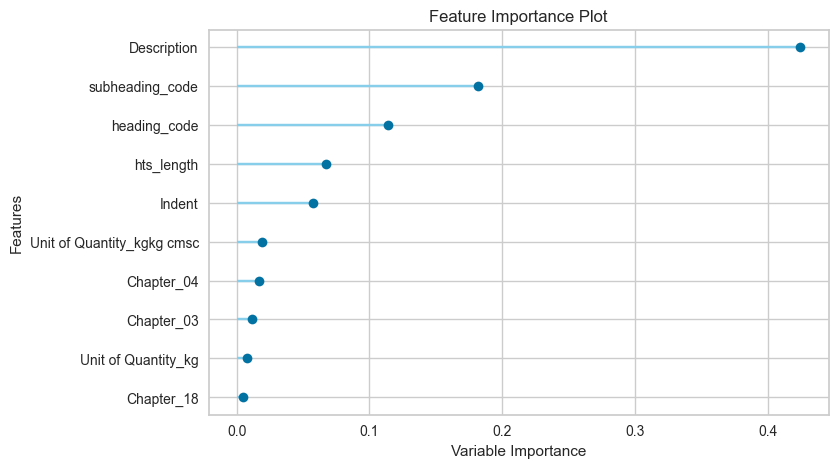

In [144]:
from pycaret.classification import plot_model

# Plot feature importance for the best model
plot_model(best_model, plot='feature')

In [156]:
save_model(best_model, r'C:\Users\karth\Projects\HTS\best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Indent', 'hts_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Description', 'Unit o...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion